In [1]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn;
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation);
#                  https://docs.python.org/3.7/ (Recommended version – 3.7).
# The Python Tutorial (python3.7): https://docs.python.org/3.7/tutorial/index.html

Python 3.10.12


In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings                                                                 # warnings — Warning control

# NumPy : The fundamental package for scientific computing with Python. NumPy is the fundamental package for scientific
#         computing in Python. It is a Python library that provides a multidimensional array object, various derived
#         objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays,
#         including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms,
#         basic linear algebra, basic statistical operations, random simulation and much more.
#     About: https://numpy.org/
#     Docs: https://numpy.org/doc/stable/
#     NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html

# Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
#         built on top of the Python programming language.
#     About: https://pandas.pydata.org/
#     Docs: https://pandas.pydata.org/docs/
#     Getting started: https://pandas.pydata.org/docs/getting_started/index.html
#     User Guide: https://pandas.pydata.org/docs/user_guide/index.html#user-guide

# Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a
#          high-level interface for drawing attractive and informative statistical graphics.
#   About: https://seaborn.pydata.org/

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version:',sns.__version__)
print('pyplot: ',plt)

numpy version: 1.26.4
pandas version:  2.2.2
seaborn version: 0.13.2
pyplot:  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>


# [Toy dataset](https://scikit-learn.org/1.5/datasets/toy_dataset.html) - Wine Dataset - using [sklearn.datasets.load_wine](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)

The wine dataset is a classic and very easy multi-class classification dataset.

The copy of UCI ML Wine Data Set dataset is downloaded and modified to fit standard format from: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

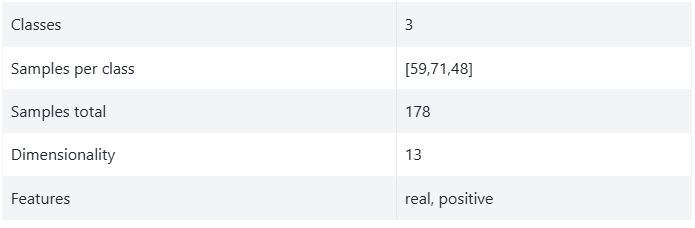

### make load dataset

In [3]:
from sklearn.datasets import load_wine                                          # load wine data loading method
# Source: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_wine

wine=load_wine()                                                                # make load data
print('Dataset object:',type(wine))                                             # see type of object returned

Dataset object: <class 'sklearn.utils._bunch.Bunch'>


In [4]:
print('Dataset Info:\n',wine.DESCR)                                             # make print dataset info

Dataset Info:
 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.

In [5]:
print('See type of data (inputs):',type(wine.data))                             # see type of data object
print('See type of targets (outputs):',type(wine.target))                       # see type of target object

See type of data (inputs): <class 'numpy.ndarray'>
See type of targets (outputs): <class 'numpy.ndarray'>


In [6]:
print('See shape of data (inputs):',wine.data.shape)                            # shape of inputs (X) -> (row, columns)
# Row -> samples or number of instances
# Columns -> features or number of attributes
print('Feature (column) names:',wine.feature_names)                             # print feature names
print('See shape of targets:',wine.target.shape)                                # see shape of targets (y) -> (samples, )
print('Unique labels in targets:',np.sort(np.unique(wine.target)))              # see all unique labels
print('Unique labels names:',wine.target_names)                                 # see target names -> index represent label

See shape of data (inputs): (178, 13)
Feature (column) names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
See shape of targets: (178,)
Unique labels in targets: [0 1 2]
Unique labels names: ['class_0' 'class_1' 'class_2']


In [7]:
decoder:dict={index:label for index,label in enumerate(wine.target_names)}      # make label decoder - label index to label names
encoder:dict={label:index for index,label in enumerate(wine.target_names)}      # make label encoder - label name to label index
print('Label decoder:',decoder)                                                 # see label decoder
print('Label encoder:',encoder)                                                 # see label encoder

Label decoder: {0: 'class_0', 1: 'class_1', 2: 'class_2'}
Label encoder: {'class_0': 0, 'class_1': 1, 'class_2': 2}


### make dataframe from data

In [8]:
wine_df=pd.DataFrame(data=wine.data,columns=wine.feature_names)                 # make dataframe
wine_df.head()                                                                  # see head of data (first five rows)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
wine_df['target']=wine.target                                                   # add target column
wine_df.tail()                                                                  # see tail of data (last five rows, default)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [ ]:
wine_df.info()                                                                  # see dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
wine_df.dtypes.value_counts()                                                   # see each data types counts

,count
float64,13
int64,1


In [ ]:
# As all values are numerical, thus only pandas.isna is enough to check for null values check / count
wine_df.isna().sum()                                                            # detect missing values for an array-like object

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [ ]:
wine_df.isna().sum().sum()                                                      # total null count
# This function takes a scalar or array-like object and indicates whether values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT
#   in datetimelike). Source: https://pandas.pydata.org/docs/reference/api/pandas.isna.html
# Also numpy.isna - Test element-wise for NaN and return result as a boolean array. Source: https://numpy.org/doc/stable/reference/generated/numpy.isnan.html

0

### slpit dataset into train and test dataset (using [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

In [ ]:
from sklearn.model_selection import train_test_split                            # load method to split arrays or matrices into random train and test subsets.
Xtrain,Xtest,ytrain,ytest=train_test_split(wine_df.drop(columns='target'),wine_df['target'],test_size=0.33)# make split with test size of 33%
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape                               # see shape of training and testing datasets

((119, 13), (119,), (59, 13), (59,))

### [Feature Selection](https://scikit-learn.org/1.5/modules/feature_selection.html)

* For regression: [r_regression](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.r_regression.html), [f_regression](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.f_regression.html), [mutual_info_regression](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.mutual_info_regression.html#)
* For classification: [chi2](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.chi2.html), [f_classif](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.f_classif.html), [mutual_info_classif](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.mutual_info_classif.html)

[pandas.DataFrame.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) - Compute pairwise correlation of columns, excluding NA/null values.

In [ ]:
wine_df.corr()                                                                  # calculate pairwise correlation of all columns

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [ ]:
wine_df.corr()['target'].iloc[:-1]                                              # get pairwise correlation only for target column (except target with itself)

,target
alcohol,-0.328222
malic_acid,0.437776
ash,-0.049643
alcalinity_of_ash,0.517859
magnesium,-0.209179
total_phenols,-0.719163
flavanoids,-0.847498
nonflavanoid_phenols,0.489109
proanthocyanins,-0.499130
color_intensity,0.265668


In [ ]:
absolute_mean_correlation:float=wine_df.corr()['target'].iloc[:-1].abs().mean() # get absolute mean correlation score
# The absolute mean correlation is calculated to provide a quick summary of the average strength of association between predictor variables and the target,
# regardless of direction. By taking the absolute values, we ignore whether the relationships are positive or negative, focusing only on the magnitude,
# which is helpful in assessing general predictive power. However, this method has limitations: it treats near-zero correlations (weak relationships) as
# equivalent to each other, regardless of sign, which can mask cases where some variables have no real association with the target. Absolute mean
# correlation is most informative when values are closer to -1 or 1, indicating strong relationships, but it can be misleading if most correlations are
# weak or near zero.
print('Mean coorelation score:',absolute_mean_correlation)                      # see mean score

Mean coorelation score: 0.49250483718643456


In [ ]:
# Get all columns have absolute mean correlation score greater than correlation mean score
condition:pd.Series=wine_df.corr()['target'].abs().iloc[:-1]>absolute_mean_correlation# get all columns condition
index:pd.Index=condition.index                                                  # get all column names
value:np.ndarray=condition.values                                               # get column condition values
fs_by_correlation=index[value]# feature selection by correlation score          # make column filtering
print('Selected column names:',fs_by_correlation)                               # see selected column names
print('Total selected columns:',len(fs_by_correlation),'out of',len(wine_df.columns)-1)# see selected column names

Selected column names: Index(['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'proanthocyanins',
       'hue', 'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
Total selected columns: 7 out of 14


### Classification with Logistic Regression Classifier ([sklearn.linear_model.LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html))

In [ ]:
# Feature selction using f-score (Compute the ANOVA F-value for the provided sample)
from sklearn.feature_selection import f_classif                                 # load f-value method for classification
# Returns -
#   f_statistic: F-statistic for each feature.
#   p_values: P-values associated with the F-statistic.
f_statistic,p_values=f_classif(Xtrain,ytrain)                                   # calculate f-value
f_statistic/=f_statistic.max()                                                  # make normalize f-score between zero and one
f_statistic_mean=f_statistic.mean()                                             # get mean f-score
# Get all columns having f-score greater than mean f-score
fs_by_f_score=Xtrain.columns[f_statistic>f_statistic_mean]                      # make feature selection based on f-score.
print('Selected column names (f-score):',fs_by_f_score)                         # see selected column names
print('Total selected columns (f-score):',len(fs_by_f_score),'out of',len(wine_df.columns))# see selected column names

Selected column names (f-score): Index(['alcohol', 'total_phenols', 'flavanoids', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
Total selected columns (f-score): 7 out of 14


In [ ]:
from sklearn.linear_model import LogisticRegression                             # load Logistic Regression class
from sklearn.model_selection import GridSearchCV                                # load GridSearchCV class - Exhaustive search over specified parameter values for an estimator
#estimator=LogisticRegression()                                                  # make object of Logistic Regression class
help(LogisticRegression)                                                        # see help for hyper-parameters selection / tuning

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-c

In [ ]:
hyperparameters:dict={                                                          # define dictionary of hyperparameters to be tuned
    'penalty':[None,'l1','l2','elasticnet'],                                    # specify the norm of the penalty
    'C':np.arange(0.01,2.0,0.1),                                                # inverse of regularization strength
    'l1_ratio':np.arange(0.01,0.9,0.1),
    #'solver':['saga']                                                           # algorithm to use in the optimization problem
    # NOTE: Only `solver = 'saga' works with all penalties and for multinomial multiclass.
}

In [ ]:
# Make Logistic Regression on best selected features by "f-score"
#linearModelSelector_fs=GridSearchCV(estimator,hyperparameters,scoring=None,cv=3,verbose=1)# make "GridSearchCV" object
linearModelSelector_fs=GridSearchCV(LogisticRegression(solver='saga',max_iter=10_000),hyperparameters,scoring=None,cv=3,verbose=1)# make "GridSearchCV" object
with warnings.catch_warnings():                                                 # temporarily suppressing warnings
  # Source: https://docs.python.org/3/library/warnings.html#temporarily-suppressing-warnings
  warnings.simplefilter('ignore',category=UserWarning)                          # ignore user warning
  # `.fit` warning -> UserWarning
  %time linearModelSelector_fs.fit(Xtrain[fs_by_f_score],ytrain)                # make model fit (train - search for best model)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
CPU times: user 6min 9s, sys: 358 ms, total: 6min 9s
Wall time: 6min 11s


In [ ]:
# See results for Logistic Regression on best selected features by "f-score"
print('Best score (gridsearch score):',linearModelSelector_fs.best_score_)      # best model score by grid serach cv
print('Best model parameters:',linearModelSelector_fs.best_params_)             # best hyper-parameters for model
print('Training score (score on training data):',linearModelSelector_fs.best_estimator_.score(Xtrain[fs_by_f_score],ytrain))# training score for best model
print('Testing score (score on testing data):',linearModelSelector_fs.best_estimator_.score(Xtest[fs_by_f_score],ytest))# testing score for best model

Best score (gridsearch score): 0.8739316239316239
Best model parameters: {'C': 0.01, 'l1_ratio': 0.01, 'penalty': 'l2'}
Training score (score on training data): 0.8907563025210085
Testing score (score on testing data): 0.8305084745762712


In [ ]:
#linearModelSelector=GridSearchCV(estimator,hyperparameters,scoring=None,cv=3,verbose=1)# make "GridSearchCV" object
linearModelSelector=GridSearchCV(LogisticRegression(solver='saga',max_iter=10_000),hyperparameters,scoring=None,cv=3,verbose=1)# make "GridSearchCV" object
with warnings.catch_warnings():                                                 # temporarily suppressing warnings
  # Source: https://docs.python.org/3/library/warnings.html#temporarily-suppressing-warnings
  warnings.simplefilter('ignore',category=UserWarning)                          # ignore user warning
  # `.fit` warning -> UserWarning
  %time linearModelSelector.fit(Xtrain,ytrain)                                  # make model fit (train - search for best model)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
[CV 1/3] END C=0.01, l1_ratio=0.01, penalty=None;, score=0.900 total time=   0.3s
[CV 2/3] END C=0.01, l1_ratio=0.01, penalty=None;, score=0.925 total time=   0.2s
[CV 3/3] END C=0.01, l1_ratio=0.01, penalty=None;, score=0.846 total time=   0.3s
[CV 1/3] END .C=0.01, l1_ratio=0.01, penalty=l1;, score=0.675 total time=   0.0s
[CV 2/3] END .C=0.01, l1_ratio=0.01, penalty=l1;, score=0.650 total time=   0.0s
[CV 3/3] END .C=0.01, l1_ratio=0.01, penalty=l1;, score=0.641 total time=   0.0s
[CV 1/3] END .C=0.01, l1_ratio=0.01, penalty=l2;, score=0.850 total time=   0.2s
[CV 2/3] END .C=0.01, l1_ratio=0.01, penalty=l2;, score=0.800 total time=   0.2s
[CV 3/3] END .C=0.01, l1_ratio=0.01, penalty=l2;, score=0.821 total time=   0.2s
[CV 1/3] END C=0.01, l1_ratio=0.01, penalty=elasticnet;, score=0.850 total time=   0.4s
[CV 2/3] END C=0.01, l1_ratio=0.01, penalty=elasticnet;, score=0.775 total time=   0.5s
[CV 3/3] END C=0.01, l1_rati

In [ ]:
print('Best score (gridsearch score):',linearModelSelector.best_score_)         # best model score by grid serach cv
print('Best model parameters:',linearModelSelector.best_params_)                # best hyper-parameters for model
print('Training score (score on training data):',linearModelSelector.best_estimator_.score(Xtrain,ytrain))# training score for best model
print('Testing score (score on testing data):',linearModelSelector.best_estimator_.score(Xtest,ytest))# testing score for best model

Best score (gridsearch score): 0.8903846153846154
Best model parameters: {'C': 0.01, 'l1_ratio': 0.01, 'penalty': None}
Training score (score on training data): 0.9327731092436975
Testing score (score on testing data): 0.9152542372881356


###  Classification with K-Nearest Neighbors Vote Classifier ([KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html))

In [ ]:
# Feature selction using "Mutual information (MI)" (Estimate mutual information for a discrete target variable)
from sklearn.feature_selection import mutual_info_classif                       # load mutual information method for classification
# Returns -
#   mi : Estimated mutual information between each feature and the target in nat units.
mi=mutual_info_classif(Xtrain,ytrain)                                           # calculate mutual information
mi/=mi.max()                                                                    # make normalize f-score between zero and one
mi_mean=mi.mean()                                                               # get mean f-score
# Get all columns having mi-score greater than mean mi-score
fs_by_mi_score=Xtrain.columns[mi>mi_mean]                                       # make feature selection based on f-score.
print('Selected column names (mi-score):',fs_by_mi_score)                       # see selected column names
print('Total selected columns (mi-score):',len(fs_by_mi_score),'out of',len(wine_df.columns))# see selected column names

Selected column names (mi-score): Index(['alcohol', 'total_phenols', 'flavanoids', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
Total selected columns (mi-score): 7 out of 14


In [ ]:
# Get maximum possible value of k -> square root of total number of samples
k_max:int=int(np.sqrt(Xtrain.shape[0]))                                         # caluclate maximum possible value of k
print('Maximum possible value of k is',k_max)                                   # make print maximum possible value of k

Maximum possible value of k is 10


In [ ]:
from sklearn.neighbors import KNeighborsClassifier                              # load K-Neighbors Classifier (for classification)
from sklearn.model_selection import GridSearchCV                                # load Grid Search
knnClf=KNeighborsClassifier()                                                   # make object of K-Neighbors Classifier with default values
knnClf.get_params()                                                             # get all default parameters (hyper-parameters)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
hyperparameters:dict={                                                          # define dictionary of hyperparameters to be tuned
    'n_neighbors':range(1,k_max+1),                                             # number of neighbors - check for 1 to k_max (10 here)
    'weights':['uniform','distance']                                            # possible weights types
}                                                                               # end of hyperparameters dictionary

In [ ]:
# Make K-Nearest Neighbors Vote on best selected features by "Mutual information (MI)"
knnModelSelector_mi=GridSearchCV(KNeighborsClassifier(),hyperparameters,scoring=None,cv=3,verbose=1)# make "GridSearchCV" object
knnModelSelector_mi.fit(Xtrain[fs_by_mi_score],ytrain)                          # make model fit (train - search for best model)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
# See results for Logistic Regression on best selected features by "Mutual information (MI)"
print('Best score (gridsearch score):',knnModelSelector_mi.best_score_)         # best model score by grid serach cv
print('Best model parameters:',knnModelSelector_mi.best_params_)                # best hyper-parameters for model
print('Training score (score on training data):',knnModelSelector_mi.best_estimator_.score(Xtrain[fs_by_mi_score],ytrain))# training score for best model
print('Testing score (score on testing data):',knnModelSelector_mi.best_estimator_.score(Xtest[fs_by_mi_score],ytest))# testing score for best model

Best score (gridsearch score): 0.6974358974358973
Best model parameters: {'n_neighbors': 10, 'weights': 'distance'}
Training score (score on training data): 1.0
Testing score (score on testing data): 0.7288135593220338


In [ ]:
# Make K-Nearest Neighbors Vote on all features
knnModelSelector=GridSearchCV(KNeighborsClassifier(),hyperparameters,scoring=None,cv=3,verbose=1)# make "GridSearchCV" object
knnModelSelector.fit(Xtrain,ytrain)                                             # make model fit (train - search for best model)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
print('Best score (gridsearch score):',knnModelSelector.best_score_)            # best model score by grid serach cv
print('Best model parameters:',knnModelSelector.best_params_)                   # best hyper-parameters for model
print('Training score (score on training data):',knnModelSelector.best_estimator_.score(Xtrain,ytrain))# training score for best model
print('Testing score (score on testing data):',knnModelSelector.best_estimator_.score(Xtest,ytest))# testing score for best model

Best score (gridsearch score): 0.6803418803418803
Best model parameters: {'n_neighbors': 2, 'weights': 'uniform'}
Training score (score on training data): 0.8487394957983193
Testing score (score on testing data): 0.6440677966101694


### Classification with Decision Tree Classifier ([class sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html))

In [ ]:
# Feature selction using "Chi-squared Stats" (Compute chi-squared stats between each non-negative feature and class)
from sklearn.feature_selection import chi2                                      # load chi-squared stats for classification
# This score can be used to select the `n_features` features with the highest values for the test chi-squared statistic from X, which must contain
#   only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.
# Returns -
#   chi2 : Chi2 statistics for each feature.
#   p_values : P-values for each feature.
chi2_statistic,p_values=chi2(Xtrain,ytrain)                                     # calculate ch2-value
chi2_statistic/=chi2_statistic.max()                                            # make normalize f-score between zero and one
chi2_statistic_mean=chi2_statistic.mean()                                       # get mean f-score
# Get all columns having ch2-score greater than mean f-score
fs_by_chi2_score=Xtrain.columns[chi2_statistic>chi2_statistic_mean]             # make feature selection based on chi2-score.
print('Selected column names (ch2-score):',fs_by_chi2_score)                    # see selected column names
print('Total selected columns (ch2-score):',len(fs_by_chi2_score),'out of',len(wine_df.columns))# see selected column names

Selected column names (ch2-score): Index(['proline'], dtype='object')
Total selected columns (ch2-score): 1 out of 14


In [ ]:
from sklearn.tree import DecisionTreeClassifier                                 # load Decision Tree Classifier (for classification)
from sklearn.model_selection import GridSearchCV                                # load Grid Search
dtreeClf=DecisionTreeClassifier()                                               # make object of Decision Tree Classifier with default values
dtreeClf.get_params()                                                           # get all default parameters (hyper-parameters)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
hyperparameters:dict={                                                          # define dictionary of hyperparameters to be tuned
    'criterion':['gini','entropy','log_loss'],                                  # list of function to measure the quality of a split
    'splitter':['best','random'],                                               # list of strategy used to choose the split at each node
    'max_depth':[                                                               # maximum depth of the tree
        int(Xtrain.shape[0]*0.25),                                              # maximum depth of the tree - 25% of sample size
        int(Xtrain.shape[0]*0.5),                                               # maximum depth of the tree - 50% of sample size
        int(Xtrain.shape[0]*1.0),                                               # maximum depth of the tree - 100% of sample size
        int(Xtrain.shape[0]*2.0),                                               # maximum depth of the tree - 200% of sample size
        None,                                                                   # maximum depth of the tree - no limit
                 ],                                                             # end of "max_depth" list
    'min_samples_split':[                                                       # list of minimum number of samples required to split an internal node
        int(Xtrain.shape[0]*0.01),                                              # minimum number of samples - 1.0% of sample size
        int(Xtrain.shape[0]*0.03),                                              # minimum number of samples - 3.0% of sample size
        int(Xtrain.shape[0]*0.05),                                              # minimum number of samples - 5.0% of sample size
        int(Xtrain.shape[0]*0.07),                                              # minimum number of samples - 7.0% of sample size
        int(Xtrain.shape[0]*0.1),                                               # minimum number of samples - 10.0% of sample size
    ],                                                                          # end of "min_samples_split" list
    'min_samples_leaf':[                                                        # minimum number of samples required to be at a leaf node
        int(Xtrain.shape[0]*0.01),                                              # minimum number - 1.0% of sample size
        int(Xtrain.shape[0]*0.03),                                              # minimum number - 3.0% of sample size
        int(Xtrain.shape[0]*0.05),                                              # minimum number - 5.0% of sample size
        int(Xtrain.shape[0]*0.1),                                               # minimum number - 10.0% of sample size
    ],                                                                          # end of "min_samples_leaf" list
}                                                                               # end of hyperparameters dictionary
hyperparameters                                                                 # see hyperparameters dictionary

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [29, 59, 119, 238, None],
 'min_samples_split': [1, 3, 5, 8, 11],
 'min_samples_leaf': [1, 3, 5, 11]}

In [ ]:
from sklearn.exceptions import FitFailedWarning                                 # warning class used if there is an error while fitting the estimator
# Make Decision tree on best selected features by "Chi-squared Stats"
dtree_chi2=GridSearchCV(DecisionTreeClassifier(),hyperparameters,scoring=None,cv=3,verbose=1)# make "GridSearchCV" object
with warnings.catch_warnings():                                                 # temporarily suppressing warnings
  # Source: https://docs.python.org/3/library/warnings.html#temporarily-suppressing-warnings
  warnings.simplefilter('ignore',category=UserWarning)                          # ignore user warning
  warnings.simplefilter('ignore',category=FitFailedWarning)                     # ignore fit fail warning
  # `.fit` warning -> Fit Failed Warning (360 fits failed out of a total of 1800)
  # `.fit` UserWarning -> One or more of the test scores are non-finite
  dtree_chi2.fit(Xtrain[fs_by_chi2_score],ytrain)                                  # make model fit (train - search for best model)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


In [ ]:
# See results for Decision tree on best selected features by "Chi-squared Stats"
print('Best score (gridsearch score):',dtree_chi2.best_score_)                  # best model score by grid serach cv
print('Best model parameters:',dtree_chi2.best_params_)                         # best hyper-parameters for model
print('Training score (score on training data):',dtree_chi2.best_estimator_.score(Xtrain[fs_by_chi2_score],ytrain))# training score for best model
print('Testing score (score on testing data):',dtree_chi2.best_estimator_.score(Xtest[fs_by_chi2_score],ytest))# testing score for best model

Best score (gridsearch score): 0.722008547008547
Best model parameters: {'criterion': 'log_loss', 'max_depth': 238, 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'random'}
Training score (score on training data): 0.773109243697479
Testing score (score on testing data): 0.6779661016949152


In [ ]:
# Make Decision tree on all features
dtree=GridSearchCV(DecisionTreeClassifier(),hyperparameters,scoring=None,cv=3,verbose=1)# make "GridSearchCV" object
with warnings.catch_warnings():                                                 # temporarily suppressing warnings
  # Source: https://docs.python.org/3/library/warnings.html#temporarily-suppressing-warnings
  warnings.simplefilter('ignore',category=UserWarning)                          # ignore user warning
  warnings.simplefilter('ignore',category=FitFailedWarning)                     # ignore fit fail warning
  # `.fit` warning -> Fit Failed Warning (360 fits failed out of a total of 1800)
  # `.fit` UserWarning -> One or more of the test scores are non-finite
  dtree.fit(Xtrain,ytrain)                                                      # make model fit (train - search for best model)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


In [ ]:
# See results for Decision tree on all features
print('Best score (gridsearch score):',dtree.best_score_)                       # best model score by grid serach cv
print('Best model parameters:',dtree.best_params_)                              # best hyper-parameters for model
print('Training score (score on training data):',dtree.best_estimator_.score(Xtrain,ytrain))# training score for best model
print('Testing score (score on testing data):',dtree.best_estimator_.score(Xtest,ytest))# testing score for best model

Best score (gridsearch score): 0.957905982905983
Best model parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 8, 'splitter': 'random'}
Training score (score on training data): 0.9411764705882353
Testing score (score on testing data): 0.8983050847457628


### Classification with C-Support Vector Classification ([class sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html))

[Kernel functions](https://scikit-learn.org/1.5/modules/svm.html#kernel-functions): Specifies the kernel type to be used in the algorithm.

In [ ]:
from sklearn.svm import LinearSVC                                               # Support Vector Machine (only Linear Kernal) for Classification
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
from sklearn.svm import SVC                                                     # Support Vector Machine for Classification class
from sklearn.model_selection import GridSearchCV                                # load GridSearchCV class

**linear function: `<x x'>`**

In [ ]:
help(LinearSVC)                                                                 # check for hyper-parameters for hyper-parameters tuning

Help on class LinearSVC in module sklearn.svm._classes:

class LinearSVC(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LinearSVC(penalty='l2', loss='squared_hinge', *, dual='auto', tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
 |  
 |  Linear Support Vector Classification.
 |  
 |  Similar to SVC with parameter kernel='linear', but implemented in terms of
 |  liblinear rather than libsvm, so it has more flexibility in the choice of
 |  penalties and loss functions and should scale better to large numbers of
 |  samples.
 |  
 |  The main differences between :class:`~sklearn.svm.LinearSVC` and
 |  :class:`~sklearn.svm.SVC` lie in the loss function used by default, and in
 |  the handling of intercept regularization between those two implementations.
 |  
 |  This class supports both dense and sparse input and the

In [ ]:
hyperparameters:dict={                                                          # define dictionary of hyperparameters to be tuned
    'penalty':['l1','l2'],                                                      # type of penalty
    'C':np.arange(0.1,2.0,0.1),                                                 # regularization parameter, - 0.1, 0.2, 0.3, ...., 1.7, 1.8, 1.9
}                                                                               # end of hyperparameters dictionary
hyperparameters                                                                 # see hyperparameters dictionary

{'penalty': ['l1', 'l2'],
 'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
        1.4, 1.5, 1.6, 1.7, 1.8, 1.9])}

In [ ]:
# Make Linear Support Vector Classification on all features
linearSVC_Clf=GridSearchCV(LinearSVC(tol=0.0001,max_iter=100_000),hyperparameters,scoring=None,cv=3,verbose=1)# make "GridSearchCV" object
linearSVC_Clf.fit(Xtrain,ytrain)                                                # make model fit (train - search for best model)

Fitting 3 folds for each of 38 candidates, totalling 114 fits


GridSearchCV(cv=3, estimator=LinearSVC(max_iter=100000),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [ ]:
# See results for Linear Support Vector Classification on all features
print('Best score (gridsearch score):',linearSVC_Clf.best_score_)               # best model score by grid serach cv
print('Best model parameters:',linearSVC_Clf.best_params_)                      # best hyper-parameters for model
print('Training score (score on training data):',linearSVC_Clf.best_estimator_.score(Xtrain,ytrain))# training score for best model
print('Testing score (score on testing data):',linearSVC_Clf.best_estimator_.score(Xtest,ytest))# testing score for best model

Best score (gridsearch score): 0.9410256410256409
Best model parameters: {'C': 0.2, 'penalty': 'l1'}
Training score (score on training data): 0.9747899159663865
Testing score (score on testing data): 0.9661016949152542


In [ ]:
help(SVC)                                                                       # check for hyper-parameters for hyper-parameters tuning

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [ ]:
from sklearn.exceptions import ConvergenceWarning                               # load warning class to capture convergence problems
from sklearn.exceptions import FitFailedWarning                                 # load warning class to capture error while fitting the estimator

**polynomial: (γ<𝑥, 𝑥'> + r)<sup>d</sup>, where `γ` specified by parameter gamma, `d` is specified by parameter degree, `r` by coef0.**

In [ ]:
hyperparameters:dict={                                                          # define dictionary of hyperparameters to be tuned
    'C':np.arange(0.1,2.0,0.1),                                                 # regularization parameter, - 0.1, 0.2, 0.3, ...., 1.7, 1.8, 1.9
    'gamma':['scale','auto'],                                                   # kernel coefficient for "rbf", "poly" and "sigmoid".
    'coef0':np.arange(0.1,1.0,0.2),                                             # independent term in kernel function. It is only significant in "poly"
    #   and "sigmoid" - 0.1, 0.3, 0.5, 0.7, 0.9
    'degree':range(2,10)                                                        # degree of the polynomial kernel function ("poly"). Must be non-negative.
    #   Ignored by all other kernels. From 2, 3, 4, ..., 8, 9.
}                                                                               # end of hyperparameters dictionary
hyperparameters                                                                 # see hyperparameters dictionary

{'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
        1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
 'gamma': ['scale', 'auto'],
 'coef0': array([0.1, 0.3, 0.5, 0.7, 0.9]),
 'degree': range(2, 10)}

In [ ]:
# Make Polynomial Support Vector Classification on all features
polySVM_Clf=GridSearchCV(SVC(kernel='poly',max_iter=100_000),hyperparameters,scoring=None,cv=3,verbose=1)# make "GridSearchCV" object
with warnings.catch_warnings():                                                 # temporarily suppressing warnings
  # Source: https://docs.python.org/3/library/warnings.html#temporarily-suppressing-warnings
  warnings.simplefilter('ignore',category=UserWarning)                          # ignore user warning
  warnings.simplefilter('ignore',category=FitFailedWarning)                     # ignore fit fail warning
  warnings.simplefilter('ignore',category=ConvergenceWarning)                   # convergence warning
  %time polySVM_Clf.fit(Xtrain,ytrain)                                          # make model fit (train - search for best model)

Fitting 3 folds for each of 1520 candidates, totalling 4560 fits
CPU times: user 1min 27s, sys: 154 ms, total: 1min 27s
Wall time: 1min 35s


In [ ]:
# See results for Polynomial Support Vector Classification on all features
print('Best score (gridsearch score):',polySVM_Clf.best_score_)                 # best model score by grid serach cv
print('Best model parameters:',polySVM_Clf.best_params_)                        # best hyper-parameters for model
print('Training score (score on training data):',polySVM_Clf.best_estimator_.score(Xtrain,ytrain))# training score for best model
print('Testing score (score on testing data):',polySVM_Clf.best_estimator_.score(Xtest,ytest))# testing score for best model

Best score (gridsearch score): 0.9235042735042734
Best model parameters: {'C': 0.1, 'coef0': 0.30000000000000004, 'degree': 4, 'gamma': 'auto'}
Training score (score on training data): 0.9747899159663865
Testing score (score on testing data): 0.9491525423728814


**rbf: exp(-γ||𝑥 - 𝑥'||<sup>2</sup>), where `γ` specified by parameter gamma**

In [ ]:
hyperparameters:dict={                                                          # define dictionary of hyperparameters to be tuned
    'C':np.arange(0.1,2.0,0.1),                                                 # regularization parameter, - 0.1, 0.2, 0.3, ...., 1.7, 1.8, 1.9
    'gamma':['scale','auto'],                                                   # kernel coefficient for "rbf", "poly" and "sigmoid"
}                                                                               # end of hyperparameters dictionary
hyperparameters                                                                 # see hyperparameters dictionary

{'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
        1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
 'gamma': ['scale', 'auto']}

In [ ]:
# Make Radial Basis Function (RBF) Kernel Support Vector Classification on all features
rbfSVM_Clf=GridSearchCV(SVC(kernel='rbf',max_iter=100_000),hyperparameters,scoring=None,cv=3,verbose=1)# make "GridSearchCV" object
with warnings.catch_warnings():                                                 # temporarily suppressing warnings
  # Source: https://docs.python.org/3/library/warnings.html#temporarily-suppressing-warnings
  warnings.simplefilter('ignore',category=UserWarning)                          # ignore user warning
  warnings.simplefilter('ignore',category=FitFailedWarning)                     # ignore fit fail warning
  warnings.simplefilter('ignore',category=ConvergenceWarning)                   # convergence warning
  %time rbfSVM_Clf.fit(Xtrain,ytrain)                                           # make model fit (train - search for best model)

Fitting 3 folds for each of 38 candidates, totalling 114 fits
CPU times: user 590 ms, sys: 1.01 ms, total: 591 ms
Wall time: 595 ms


In [ ]:
# See results for Radial Basis Function (RBF) Kernel Support Vector Classification on all features
print('Best score (gridsearch score):',rbfSVM_Clf.best_score_)                  # best model score by grid serach cv
print('Best model parameters:',rbfSVM_Clf.best_params_)                         # best hyper-parameters for model
print('Training score (score on training data):',rbfSVM_Clf.best_estimator_.score(Xtrain,ytrain))# training score for best model
print('Testing score (score on testing data):',rbfSVM_Clf.best_estimator_.score(Xtest,ytest))# testing score for best model

Best score (gridsearch score): 0.6888888888888888
Best model parameters: {'C': 1.1, 'gamma': 'scale'}
Training score (score on training data): 0.6890756302521008
Testing score (score on testing data): 0.6440677966101694


**sigmoid: `tanh(-γ<𝑥,𝑥'> + r)`, where `r` is specified by `coef0` and `γ` specified by parameter gamma.**

In [ ]:
hyperparameters:dict={                                                          # define dictionary of hyperparameters to be tuned
    'C':np.arange(0.1,2.0,0.1),                                                 # regularization parameter, - 0.1, 0.2, 0.3, ...., 1.7, 1.8, 1.9
    'gamma':['scale','auto'],                                                   # kernel coefficient for "rbf", "poly" and "sigmoid"
    'coef0':np.arange(0.1,1.0,0.2),                                             # independent term in kernel function. It is only significant in "poly"
    #   and "sigmoid" - 0.1, 0.3, 0.5, 0.7, 0.9
}                                                                               # end of hyperparameters dictionary
hyperparameters                                                                 # see hyperparameters dictionary

{'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
        1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
 'gamma': ['scale', 'auto'],
 'coef0': array([0.1, 0.3, 0.5, 0.7, 0.9])}

In [ ]:
from sklearn.exceptions import ConvergenceWarning                               # load warning class to capture convergence problems
from sklearn.exceptions import FitFailedWarning                                 # load warning class to capture error while fitting the estimator
# Make Sigmoid Kernel Support Vector Classification on all features
sigmoidSVM_Clf=GridSearchCV(SVC(kernel='sigmoid',max_iter=100_000),hyperparameters,scoring=None,cv=3,verbose=1)# make "GridSearchCV" object
with warnings.catch_warnings():                                                 # temporarily suppressing warnings
  # Source: https://docs.python.org/3/library/warnings.html#temporarily-suppressing-warnings
  warnings.simplefilter('ignore',category=UserWarning)                          # ignore user warning
  warnings.simplefilter('ignore',category=FitFailedWarning)                     # ignore fit fail warning
  warnings.simplefilter('ignore',category=ConvergenceWarning)                   # convergence warning
  %time sigmoidSVM_Clf.fit(Xtrain,ytrain)                                       # make model fit (train - search for best model)

Fitting 3 folds for each of 190 candidates, totalling 570 fits
CPU times: user 3.67 s, sys: 18.9 ms, total: 3.69 s
Wall time: 3.76 s


In [ ]:
# See results for Sigmoid Kernel Support Vector Classification on all features
print('Best score (gridsearch score):',sigmoidSVM_Clf.best_score_)                  # best model score by grid serach cv
print('Best model parameters:',sigmoidSVM_Clf.best_params_)                         # best hyper-parameters for model
print('Training score (score on training data):',sigmoidSVM_Clf.best_estimator_.score(Xtrain,ytrain))# training score for best model
print('Testing score (score on testing data):',sigmoidSVM_Clf.best_estimator_.score(Xtest,ytest))# testing score for best model

Best score (gridsearch score): 0.46217948717948715
Best model parameters: {'C': 0.1, 'coef0': 0.1, 'gamma': 'scale'}
Training score (score on training data): 0.46218487394957986
Testing score (score on testing data): 0.2711864406779661


### Classification with Stochastic Gradient Descent (SGD) Classification ([class sklearn.linear_model.SGDClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier))

In [ ]:
from sklearn.linear_model import SGDClassifier                                  # load Linear classifiers (SVM, logistic regression, etc.) with SGD training
from sklearn.model_selection import GridSearchCV                                # load GridSearchCV class

In [ ]:
help(SGDClassifier)                                                             # check for hyper-parameters for hyper-parameters tuning

Help on class SGDClassifier in module sklearn.linear_model._stochastic_gradient:

class SGDClassifier(BaseSGDClassifier)
 |  SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
 |  
 |  Linear classifiers (SVM, logistic regression, etc.) with SGD training.
 |  
 |  This estimator implements regularized linear models with stochastic
 |  gradient descent (SGD) learning: the gradient of the loss is estimated
 |  each sample at a time and the model is updated along the way with a
 |  decreasing strength schedule (aka learning rate). SGD allows minibatch
 |  (online/out-of-core) learning via the `partial_fit` method.
 |  For best results using the default learning rate schedule, the data sho

In [ ]:
# For all learning rate except - "invscaling"
hyperparameters:dict={                                                          # define dictionary of hyperparameters to be tuned
    'loss':['hinge','log_loss','modified_huber','squared_hinge','perceptron','squared_error','huber','epsilon_insensitive',
            'squared_epsilon_insensitive'],                                     # list of all losses - the loss function to be used
    'penalty':['l1','l2','elasticnet'],                                         # penalty (aka regularization term) to be used
    'alpha':[0.0001,0.001,0.01],                                                # constant that multiplies the regularization term
    'l1_ratio':[0.01,0.25,0.5,0.75,0.99],                                       # elastic Net mixing parameter
    'learning_rate':['constant','optimal','adaptive'],                          # learning rate schedule - except "invscaling"
    'eta0':[0.0001,0.0005,0.001],                                               # initial learning rate for the "constant", "invscaling" or "adaptive" schedules
}                                                                               # end of hyperparameters dictionary
hyperparameters                                                                 # see hyperparameters dictionary

{'loss': ['hinge',
  'log_loss',
  'modified_huber',
  'squared_hinge',
  'perceptron',
  'squared_error',
  'huber',
  'epsilon_insensitive',
  'squared_epsilon_insensitive'],
 'penalty': ['l1', 'l2', 'elasticnet'],
 'alpha': [0.0001, 0.001, 0.01],
 'l1_ratio': [0.01, 0.25, 0.5, 0.75, 0.99],
 'learning_rate': ['constant', 'optimal', 'adaptive'],
 'eta0': [0.0001, 0.0005, 0.001]}

In [ ]:
from sklearn.exceptions import ConvergenceWarning                               # load warning class to capture convergence problems
from sklearn.exceptions import FitFailedWarning                                 # load warning class to capture error while fitting the estimator
# Make Stochastic Gradient Descent (SGD) Classification on all features
sgdClf=GridSearchCV(SGDClassifier(max_iter=10_000,early_stopping=True,validation_fraction=0.1,n_iter_no_change=10),hyperparameters,scoring=None,cv=3,
                    verbose=1)                                                  # make "GridSearchCV" object
with warnings.catch_warnings():                                                 # temporarily suppressing warnings
  # Source: https://docs.python.org/3/library/warnings.html#temporarily-suppressing-warnings
  warnings.simplefilter('ignore',category=UserWarning)                          # ignore user warning
  warnings.simplefilter('ignore',category=FitFailedWarning)                     # ignore fit fail warning
  warnings.simplefilter('ignore',category=ConvergenceWarning)                   # convergence warning
  %time sgdClf.fit(Xtrain,ytrain)                                               # make model fit (train - search for best model)

Fitting 3 folds for each of 3645 candidates, totalling 10935 fits
CPU times: user 10min 25s, sys: 3.92 s, total: 10min 29s
Wall time: 10min 42s


In [ ]:
# See results for Stochastic Gradient Descent (SGD) Classification on all features
print('Best score (gridsearch score):',sgdClf.best_score_)                      # best model score by grid serach cv
print('Best model parameters:',sgdClf.best_params_)                             # best hyper-parameters for model
print('Training score (score on training data):',sgdClf.best_estimator_.score(Xtrain,ytrain))# training score for best model
print('Testing score (score on testing data):',sgdClf.best_estimator_.score(Xtest,ytest))# testing score for best model

Best score (gridsearch score): 0.7480769230769231
Best model parameters: {'alpha': 0.0001, 'eta0': 0.0001, 'l1_ratio': 0.5, 'learning_rate': 'adaptive', 'loss': 'epsilon_insensitive', 'penalty': 'l2'}
Training score (score on training data): 0.6386554621848739
Testing score (score on testing data): 0.6610169491525424


In [ ]:
# For learning rate - "invscaling"
hyperparameters:dict={                                                          # define dictionary of hyperparameters to be tuned
    'loss':['hinge','log_loss','modified_huber','squared_hinge','perceptron','squared_error','huber','epsilon_insensitive',
            'squared_epsilon_insensitive'],                                     # list of all losses - the loss function to be used
    'penalty':['l1','l2','elasticnet'],                                         # penalty (aka regularization term) to be used
    'alpha':[0.0001,0.001,0.01],                                                # constant that multiplies the regularization term
    'l1_ratio':[0.01,0.25,0.5,0.75,0.99],                                       # elastic Net mixing parameter
    #'learning_rate':['constant','optimal','adaptive'],                          # learning rate schedule - except "invscaling"
    'eta0':[0.0001,0.0005,0.001],                                               # initial learning rate for the "constant", "invscaling" or "adaptive" schedules
    'power_t':[-3,-2,-0.5,0.5,2,3],                                             # exponent for inverse scaling learning rate
}                                                                               # end of hyperparameters dictionary
hyperparameters                                                                 # see hyperparameters dictionary

{'loss': ['hinge',
  'log_loss',
  'modified_huber',
  'squared_hinge',
  'perceptron',
  'squared_error',
  'huber',
  'epsilon_insensitive',
  'squared_epsilon_insensitive'],
 'penalty': ['l1', 'l2', 'elasticnet'],
 'alpha': [0.0001, 0.001, 0.01],
 'l1_ratio': [0.01, 0.25, 0.5, 0.75, 0.99],
 'eta0': [0.0001, 0.0005, 0.001],
 'power_t': [-3, -2, -0.5, 0.5, 2, 3]}

In [ ]:
# Make Stochastic Gradient Descent (SGD) Classification on all features (only for learning rate - "invscaling")
invrSgdClf=GridSearchCV(SGDClassifier(learning_rate='invscaling',max_iter=10_000,early_stopping=True,validation_fraction=0.1,n_iter_no_change=10),
                    hyperparameters,scoring=None,cv=3,verbose=1)                # make "GridSearchCV" object
with warnings.catch_warnings():                                                 # temporarily suppressing warnings
  # Source: https://docs.python.org/3/library/warnings.html#temporarily-suppressing-warnings
  warnings.simplefilter('ignore',category=UserWarning)                          # ignore user warning
  warnings.simplefilter('ignore',category=FitFailedWarning)                     # ignore fit fail warning
  warnings.simplefilter('ignore',category=ConvergenceWarning)                   # convergence warning
  %time invrSgdClf.fit(Xtrain,ytrain)                                           # make model fit (train - search for best model)

Fitting 3 folds for each of 7290 candidates, totalling 21870 fits
CPU times: user 11min 26s, sys: 4.13 s, total: 11min 30s
Wall time: 11min 35s


In [ ]:
# See results for Stochastic Gradient Descent (SGD) Classification on all features (only for learning rate - "invscaling")
print('Best score (gridsearch score):',invrSgdClf.best_score_)                  # best model score by grid serach cv
print('Best model parameters:',invrSgdClf.best_params_)                         # best hyper-parameters for model
print('Training score (score on training data):',invrSgdClf.best_estimator_.score(Xtrain,ytrain))# training score for best model
print('Testing score (score on testing data):',invrSgdClf.best_estimator_.score(Xtest,ytest))# testing score for best model

Best score (gridsearch score): 0.6974358974358973
Best model parameters: {'alpha': 0.001, 'eta0': 0.0001, 'l1_ratio': 0.99, 'loss': 'hinge', 'penalty': 'l1', 'power_t': 0.5}
Training score (score on training data): 0.6218487394957983
Testing score (score on testing data): 0.6271186440677966


### Classification with Gaussian Naive Bayes (GaussianNB) [class sklearn.naive_bayes.GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [ ]:
from sklearn.naive_bayes import GaussianNB                                      # load Gaussian Naive Bayes (GaussianNB) Classifier

In [ ]:
help(GaussianNB)                                                                # no hyper-parameters for hyper-parameters tuning

Help on class GaussianNB in module sklearn.naive_bayes:

class GaussianNB(_BaseNB)
 |  GaussianNB(*, priors=None, var_smoothing=1e-09)
 |  
 |  Gaussian Naive Bayes (GaussianNB).
 |  
 |  Can perform online updates to model parameters via :meth:`partial_fit`.
 |  For details on algorithm used to update feature means and variance online,
 |  see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:
 |  
 |      http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
 |  
 |  Read more in the :ref:`User Guide <gaussian_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  priors : array-like of shape (n_classes,), default=None
 |      Prior probabilities of the classes. If specified, the priors are not
 |      adjusted according to the data.
 |  
 |  var_smoothing : float, default=1e-9
 |      Portion of the largest variance of all features that is added to
 |      variances for calculation stability.
 |  
 |      .. versionadded:: 0.20
 |  
 |  Attributes
 |  

In [ ]:
# Make Gaussian Naive Bayes (GaussianNB) Classifier
gnbClassifiers:dict={                                                           # define GaussianNB Classifiers dictionary
    'gnbOnAllFreatures':GaussianNB().fit(Xtrain,ytrain),                        # Gaussian Naive Bayes (GaussianNB) Classifier on all feature selection
    'gnbOnCorrelation':GaussianNB().fit(Xtrain[fs_by_correlation],ytrain),      # Gaussian Naive Bayes (GaussianNB) Classifier on feature selection by correlation
    'gnbOnChi2Score':GaussianNB().fit(Xtrain[fs_by_chi2_score],ytrain),         # Gaussian Naive Bayes (GaussianNB) Classifier on Chi2 Score
    'gnbOnMI_Score':GaussianNB().fit(Xtrain[fs_by_mi_score],ytrain),            # Gaussian Naive Bayes (GaussianNB) Classifier on Mutual Info Score
    'gnbOnF_Score':GaussianNB().fit(Xtrain[fs_by_f_score],ytrain),              # Gaussian Naive Bayes (GaussianNB) Classifier on f-Score
}                                                                               # end of GaussianNB Classifiers dictionary

In [ ]:
# See results for Naive Bayes (GaussianNB) Classifier
print('Training score (score on training data - all features):',gnbClassifiers['gnbOnAllFreatures'].score(Xtrain,ytrain))# training score (on all features)
print('Training score (score on training data - correlation features):',gnbClassifiers['gnbOnCorrelation'].score(Xtrain[fs_by_correlation],ytrain))# training score (on features correlation features)
print('Training score (score on training data - Chi2 features):',gnbClassifiers['gnbOnChi2Score'].score(Xtrain[fs_by_chi2_score],ytrain))# training score (on features Chi2 features)
print('Training score (score on training data - MI features):',gnbClassifiers['gnbOnMI_Score'].score(Xtrain[fs_by_mi_score],ytrain))# training score (on features Chi2 features)
print('Training score (score on training data - F features):',gnbClassifiers['gnbOnF_Score'].score(Xtrain[fs_by_f_score],ytrain))# training score (on features F features)
print('Testing score (score on testing data - all features):',gnbClassifiers['gnbOnAllFreatures'].score(Xtest,ytest))# testing score (on all features)
print('Testing score (score on testing data - correlation features):',gnbClassifiers['gnbOnCorrelation'].score(Xtest[fs_by_correlation],ytest))# testing score (on features correlation features)
print('Testing score (score on testing data - Chi2 features):',gnbClassifiers['gnbOnChi2Score'].score(Xtest[fs_by_chi2_score],ytest))# testing score (on features Chi2 features)
print('Testing score (score on testing data - MI features):',gnbClassifiers['gnbOnMI_Score'].score(Xtest[fs_by_mi_score],ytest))# testing score (on features Chi2 features)
print('Testing score (score on testing data - F features):',gnbClassifiers['gnbOnF_Score'].score(Xtest[fs_by_f_score],ytest))# testing score (on features F features)

Training score (score on training data - all features): 0.9747899159663865
Training score (score on training data - correlation features): 0.9663865546218487
Training score (score on training data - Chi2 features): 0.7226890756302521
Training score (score on training data - MI features): 0.9747899159663865
Training score (score on training data - F features): 0.9747899159663865
Testing score (score on testing data - all features): 0.9661016949152542
Testing score (score on testing data - correlation features): 0.9322033898305084
Testing score (score on testing data - Chi2 features): 0.6610169491525424
Testing score (score on testing data - MI features): 0.9491525423728814
Testing score (score on testing data - F features): 0.9491525423728814


# Is this best Results ?

* Try selecting all features and test again (Is [feature selection](https://scikit-learn.org/stable/modules/feature_selection.html) worked?)
* Try Normalizing/Scaling ([Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html)) Dataset.

# Reference

* [Official python docs](https://docs.python.org/3/)
* [Official python tutorials](https://docs.python.org/3/tutorial/index.html)
* [Python Numpy Tutorial (with Jupyter and Colab) - Stanford - Spring 2022](https://cs231n.github.io/python-numpy-tutorial/)
* [NumPy: the absolute basics for beginners](https://numpy.org/devdocs/user/absolute_beginners.html)
* [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
* [Matplotlib - Tutorials](https://matplotlib.org/stable/tutorials/index)
* [An introduction to seaborn](https://seaborn.pydata.org/tutorial/introduction.html)
* [Underfitting vs. Overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)
* [Toy dataset](https://scikit-learn.org/1.5/datasets/toy_dataset.html)
* [Wine Dataset](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)
* [Feature Selection](https://scikit-learn.org/1.5/modules/feature_selection.html)
* [Logistic Regression Classifier](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [K-Nearest Neighbors Vote Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Decision Tree Classifier](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* [C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* [Kernel functions](https://scikit-learn.org/1.5/modules/svm.html#kernel-functions)
* [Stochastic Gradient Descent (SGD) Classification](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
* [Gaussian Naive Bayes (GaussianNB)](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)